In [1]:
from preprocessing import clean_df
from preprocessing import create_target
from preprocessing import create_feature_dataframe

from model import column_index
from model import create_model

from make_prediction import clean_df_pred
from make_prediction import make_prediction

from final_pipeline import Process_Result

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import HuberRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pickle

from basis_expansions import NaturalCubicSpline

from regression_helpers import (plot_univariate_smooth,
                                bootstrap_train,
                                display_coef,
                                plot_bootstrap_coefs,
                                plot_partial_depenence,
                                plot_partial_dependences,
                                predicteds_vs_actuals)

from dftransformers import (ColumnSelector, Identity,
                            FeatureUnion, MapFeature,
                            Intercept)


%matplotlib inline

In [2]:
df = pd.read_csv('recs2009_public.csv')


/home/ryan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
with open('pipe_model.p', 'rb') as f:
    pipe = pickle.load(f)

In [4]:
df = clean_df(df)

In [5]:
X = create_feature_dataframe(df)

In [6]:
y = create_target(df)

In [7]:
def column_index(df, query_cols):
    """
    Creates indecies from column names to be used in OneHotEncoder
    Input 
    ------- 
    Dataframe with all columns
    query_cols columns which indicies will be returned

    Output
    -------
    Indicies of columns from input
    """


    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


In [8]:
col_dummies_index = column_index(X, ['DIVISION','REPORTABLE_DOMAIN',
               'TYPEHUQ','Climate_Region_Pub',
               'AIA_Zone','CONDCOOP','CONVERSION','WALLTYPE','ROOFTYPE',
               'STOVENFUEL','STOVEFUEL','OVENFUEL', 'OVENUSE','AMTMICRO',
               'OUTGRILLFUEL', 'NUMMEAL','FUELFOOD', 'TVTYPE1','PCTYPE1',
               'EQUIPM', 'FUELHEAT', 'NGFPFLUE','USENGFP','DIFFUEL','EQMAMT',
               'H2OTYPE1', 'FUELH2O', 'COOLTYPE', 'FUELPOOL','FUELTUB','TYPEGLASS',
               'ADQINSUL','DRAFTY'])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 52)

In [10]:
energy_pred = make_prediction(pipe, X_test)
max(y_test)

354994

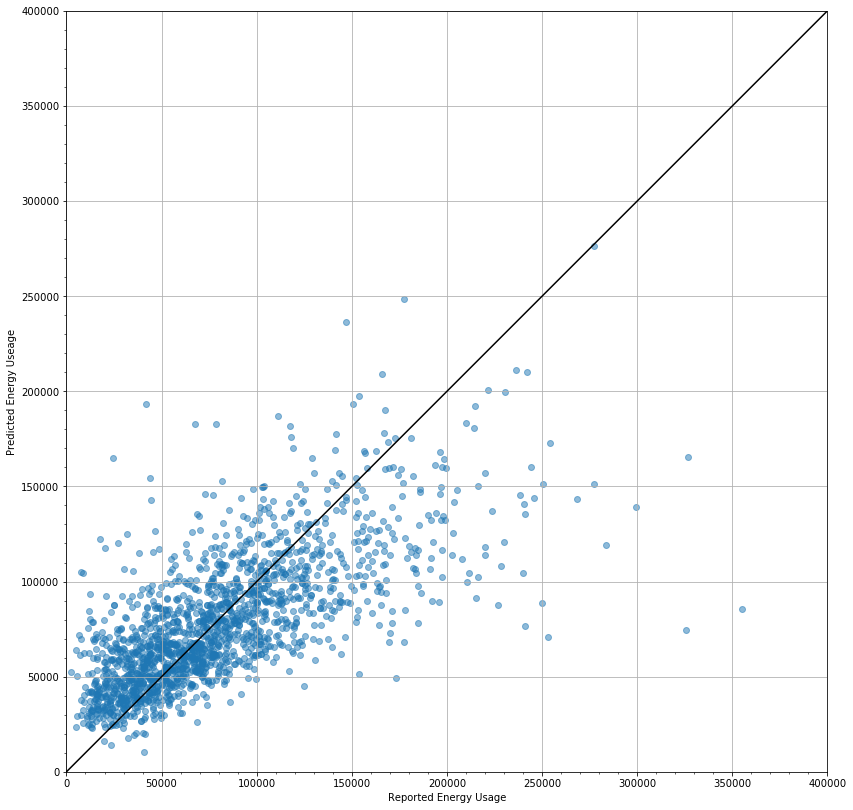

In [19]:
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(0,400000)
plt.plot(x,x, color = 'black')


plt.scatter(y_test, energy_pred**2, alpha= .5)
plt.ylabel('Predicted Energy Useage')
plt.xlabel('Reported Energy Usage')
plt.rcParams["figure.figsize"] = [14,14]
plt.savefig('act_vs_pred_ridge')
plt.minorticks_on()
plt.grid(True)

In [12]:
residual = energy_pred**2 - y_test

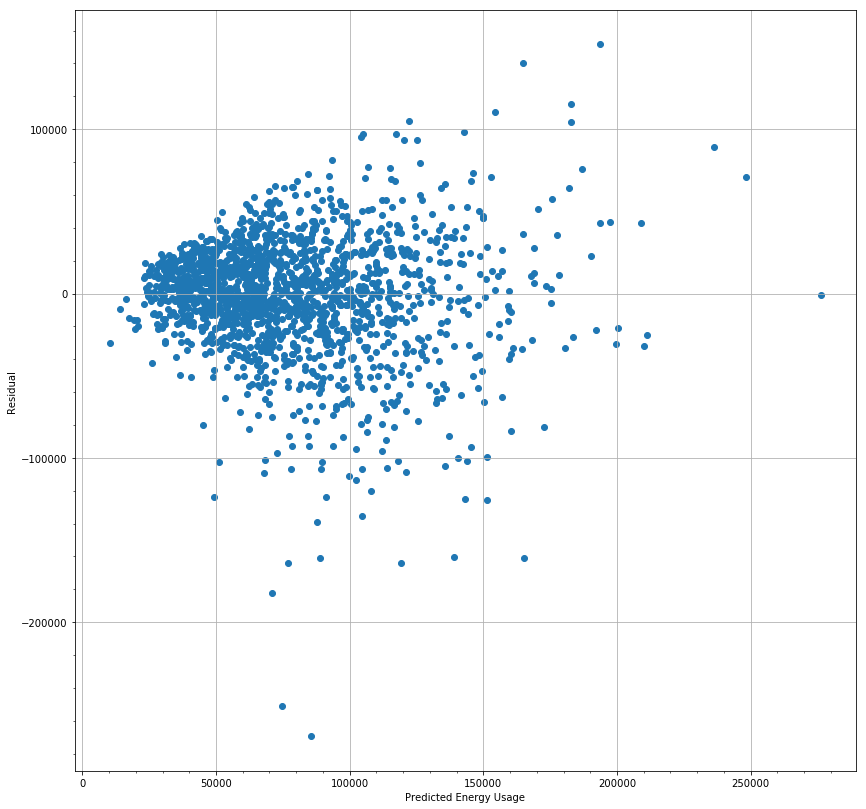

In [13]:

plt.scatter(energy_pred**2, residual)
#plt.t("Residuals")
plt.ylabel('Residual')
plt.xlabel('Predicted Energy Usage')
plt.savefig('residuals')
plt.minorticks_on()
plt.grid(True)

In [14]:
pipe.score(X_test, y_test**2)

-0.56268631057321605

In [15]:
df = pd.read_csv('recs2009_public.csv')

/home/ryan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
def plot_one_univariate(ax, var_name, mask=None):
    if mask is None:
        plot_univariate_smooth(
            ax,
            df[var_name].values.reshape(-1, 1), 
            df['TOTALBTU'],
            bootstrap=200)
    else:
        plot_univariate_smooth(
            ax,
            df[var_name].values.reshape(-1, 1), 
            df['TOTALBTU'],
            mask=mask,
            bootstrap=200)

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

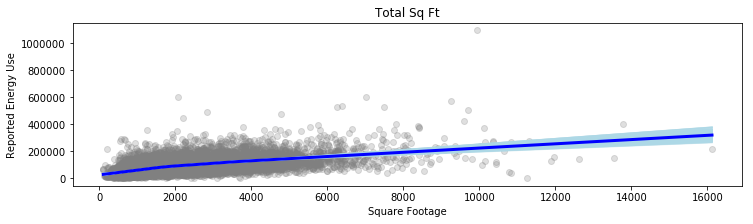

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "TOTSQFT")
ax.set_title("Total Sq Ft")
plt.ylabel('Reported Energy Use')
plt.xlabel('Square Footage')
plt.savefig('totsqft_uni')

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data wi

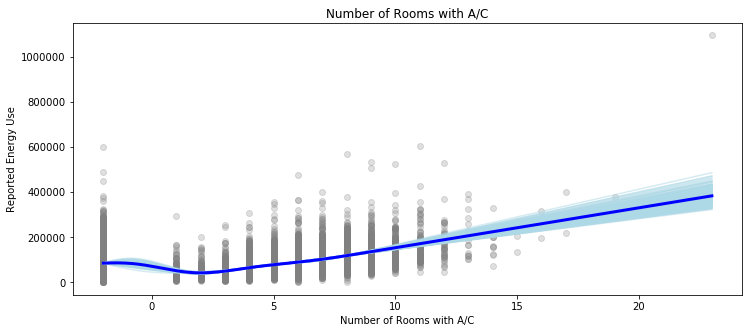

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_one_univariate(ax, "ACROOMS")
ax.set_title("Number of Rooms with A/C")
plt.ylabel('Reported Energy Use')
plt.xlabel('Number of Rooms with A/C')